In today's highly competitive food industry, restaurant aggregators like Zomato play a crucial role in connecting customers with dining options worldwide.

This project explores a real-world dataset from Zomato to analyze:
- Restaurant distributions across countries
- Cost and rating behaviors
- Online delivery trends
- Popular cuisines and cities

Through data cleaning, visualization, and analysis, I aim to derive insights that could support business decision-making and marketing strategies.


- Understand the restaurant market geographically.
- Find key factors that influence high restaurant ratings.
- Explore customer preferences regarding cuisines, cost, and delivery.
- Identify opportunities for market expansion and strategy improvements.


In [67]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Setting styles for plots
sns.set(style="whitegrid")
%matplotlib inline


In [68]:
# Load Zomato dataset
df_main = pd.read_csv('zomato.csv', encoding='latin-1')

# Load country code dataset
df_country = pd.read_excel('Country-Code.xlsx')

# Display first few records
df_main.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [69]:
# Checking the shape of the datasets
print("Main Data Shape:", df_main.shape)
print("Country Code Shape:", df_country.shape)

# Checking the info of main dataset
df_main.info()

# Quick statistical summary
df_main.describe()


Main Data Shape: (9551, 21)
Country Code Shape: (15, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering no

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [70]:
# Checking for missing values
df_main.isnull().sum()

# Cuisines column has missing values
# Filling missing Cuisines with 'Not Available'
df_main['Cuisines'].fillna('Not Available', inplace=True)

# Verifying missing values again
df_main.isnull().sum()


<ipython-input-70-e68061d50bd8>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_main['Cuisines'].fillna('Not Available', inplace=True)


,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,0


In [71]:
# Merge country code dataset into main dataset
df_merged = pd.merge(df_main, df_country, on='Country Code', how='left')

# Check new dataset
df_merged.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [72]:
print("Maximum votes received by any restaurant:", df_merged['Votes'].max())


Maximum votes received by any restaurant: 10934


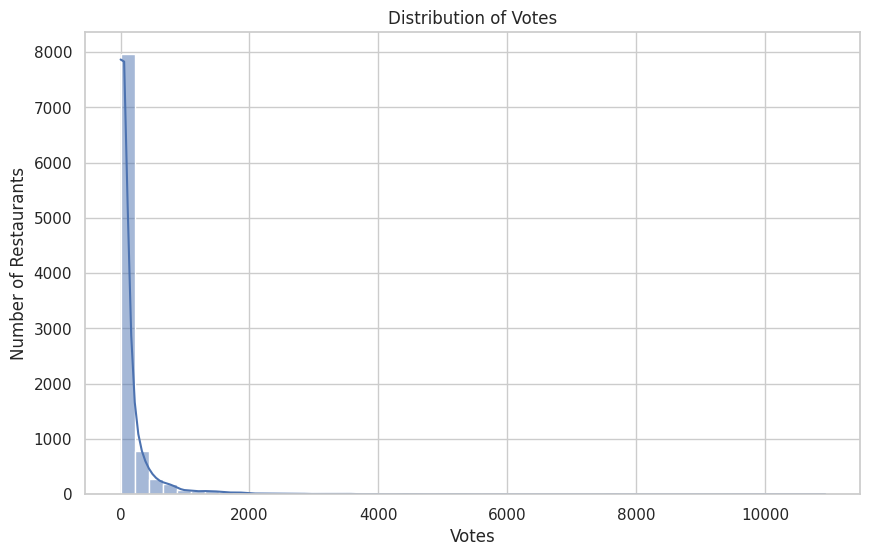

In [73]:
plt.figure(figsize=(10,6))
sns.histplot(df_merged['Votes'], bins=50, kde=True)
plt.title('Distribution of Votes')
plt.xlabel('Votes')
plt.ylabel('Number of Restaurants')
plt.show()


In [74]:
# Counting restaurants per country
country_counts = df_merged['Country'].value_counts()

# Display top 10 countries
country_counts.head(10)


,count
Country,
India,8652
United States,434
United Kingdom,80
Brazil,60
South Africa,60
UAE,60
New Zealand,40
Turkey,34
Australia,24


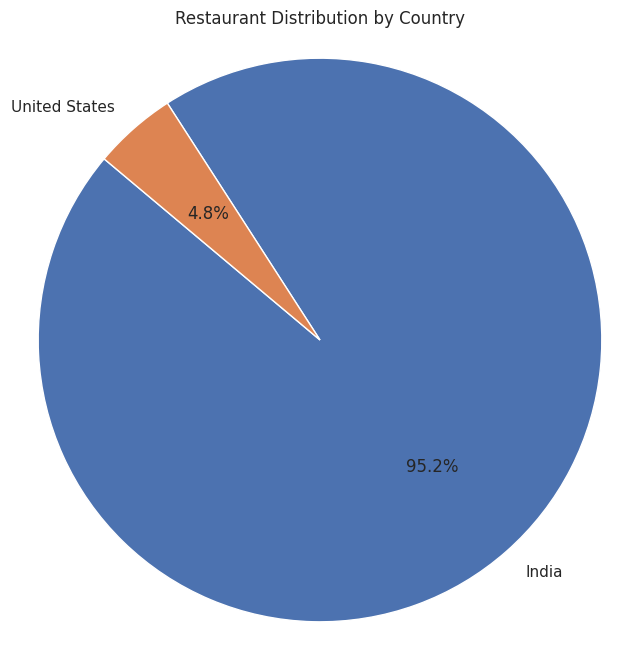

In [75]:
# Plotting pie chart for countries having more than 100 restaurants
plt.figure(figsize=(8,8))
countries_with_100_plus = country_counts[country_counts>100]
plt.pie(countries_with_100_plus, labels=countries_with_100_plus.index, autopct='%1.1f%%', startangle=140)
plt.title('Restaurant Distribution by Country')
plt.axis('equal')
plt.show()


In [76]:
def rating_category(rating):
    if rating >= 4.0:
        return 'Excellent'
    elif rating >= 3.0:
        return 'Good'
    elif rating >= 2.0:
        return 'Average'
    else:
        return 'Poor'

df_merged['Rating Category'] = df_merged['Aggregate rating'].apply(rating_category)

# Checking the distribution
df_merged['Rating Category'].value_counts()


,count
Rating Category,
Good,4590
Poor,2151
Average,1430
Excellent,1380


In [77]:
def price_category(price_range):
    if price_range == 1:
        return 'Low'
    elif price_range == 2:
        return 'Medium'
    elif price_range == 3:
        return 'High'
    else:
        return 'Premium'

df_merged['Price Category'] = df_merged['Price range'].apply(price_category)

# Checking the distribution
df_merged['Price Category'].value_counts()


,count
Price Category,
Low,4444
Medium,3113
High,1408
Premium,586


<ipython-input-78-9073bd0303b5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_merged, x='Rating Category', palette='Set2')


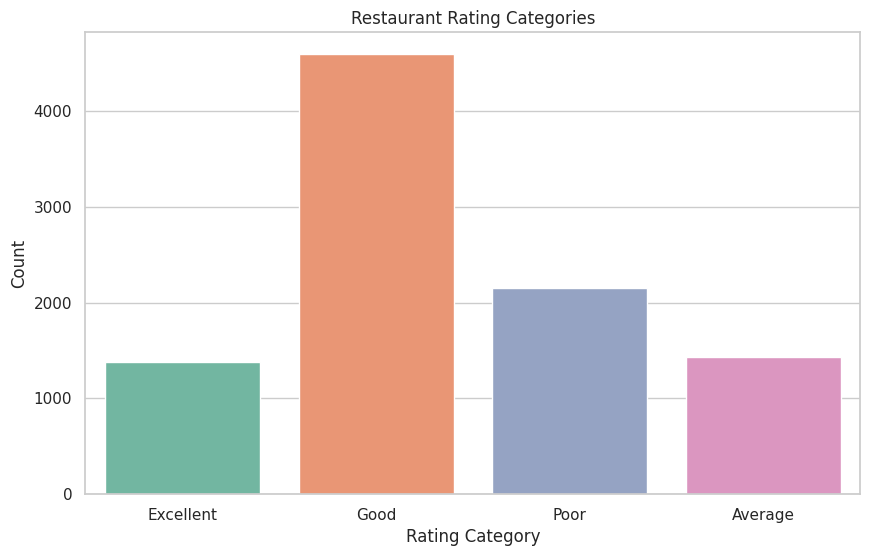

In [78]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_merged, x='Rating Category', palette='Set2')
plt.title('Restaurant Rating Categories')
plt.xlabel('Rating Category')
plt.ylabel('Count')
plt.show()


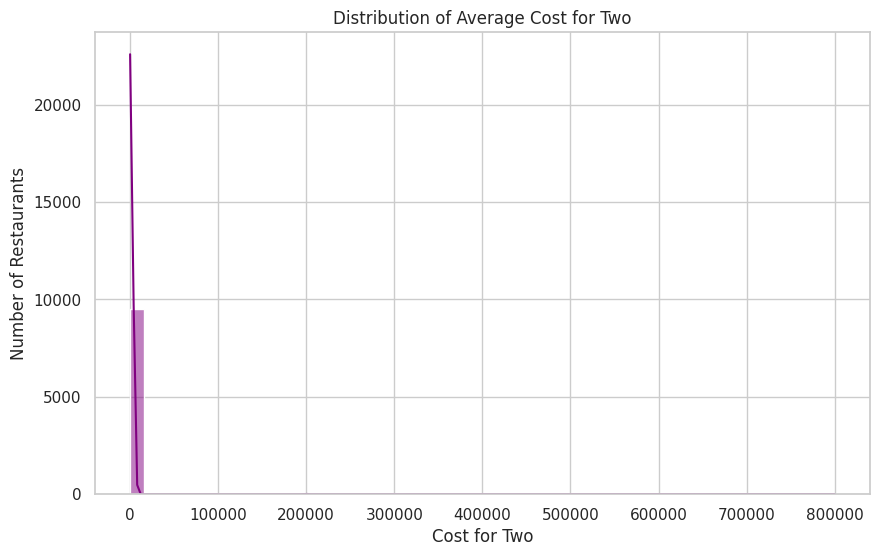

In [79]:
plt.figure(figsize=(10,6))
sns.histplot(df_merged['Average Cost for two'], bins=50, kde=True, color='purple')
plt.title('Distribution of Average Cost for Two')
plt.xlabel('Cost for Two')
plt.ylabel('Number of Restaurants')
plt.show()


<ipython-input-80-c7675234fd7e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines.index, y=top_cuisines.values, palette='rocket')


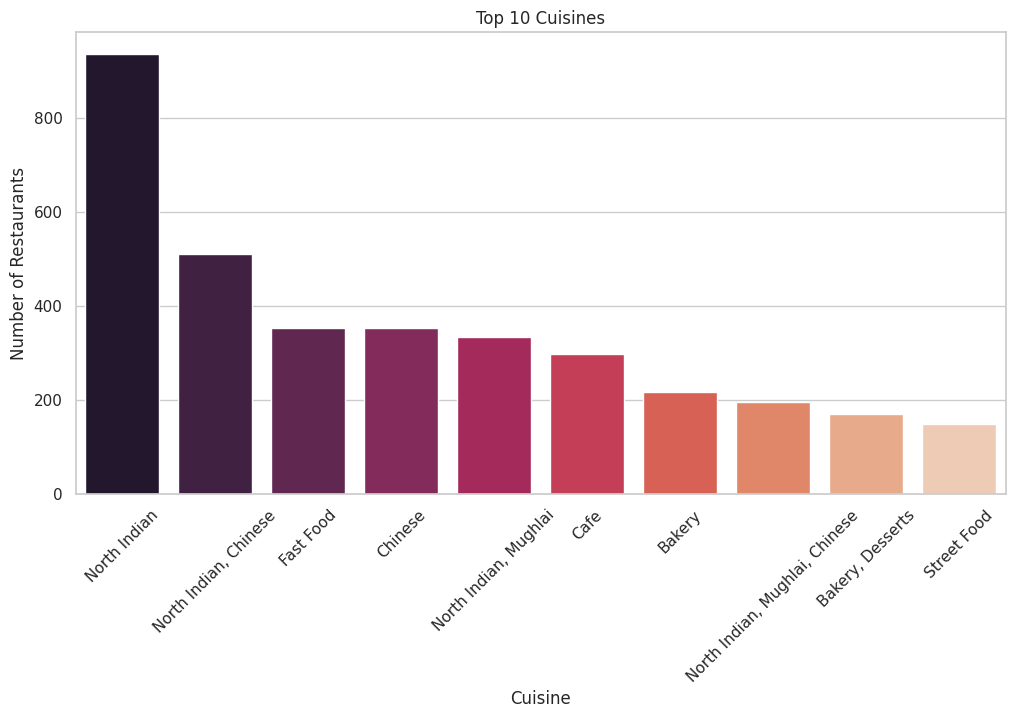

In [80]:
# Finding the most common cuisines
top_cuisines = df_merged['Cuisines'].value_counts().head(10)

# Plotting
plt.figure(figsize=(12,6))
sns.barplot(x=top_cuisines.index, y=top_cuisines.values, palette='rocket')
plt.title('Top 10 Cuisines')
plt.xticks(rotation=45)
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.show()


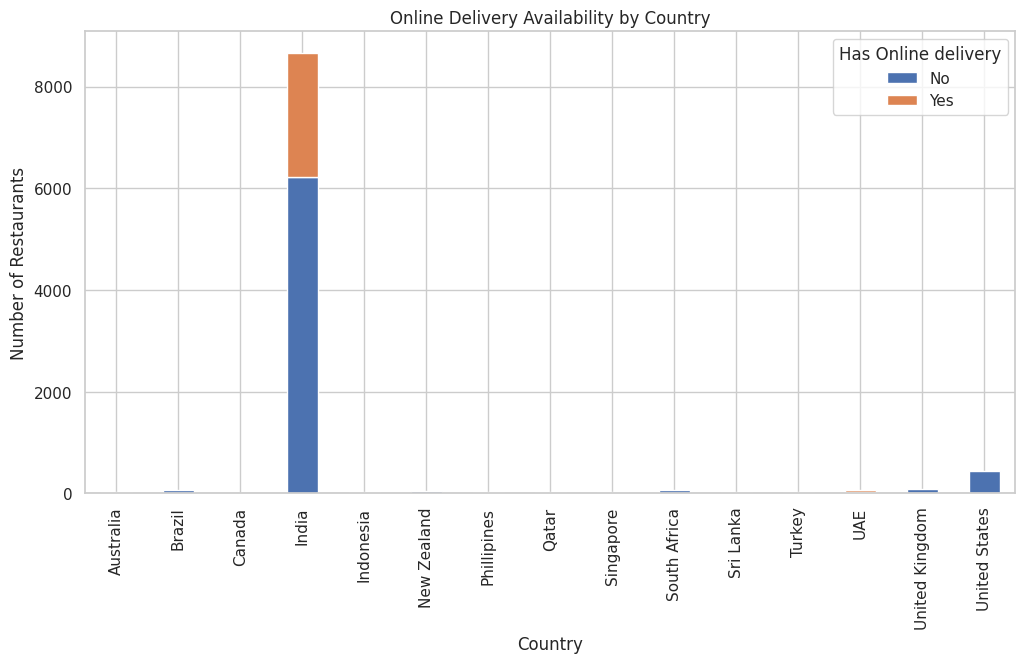

In [81]:
# Group by country and online delivery
online_delivery = df_merged.groupby(['Country', 'Has Online delivery']).size().unstack()

# Plot
online_delivery.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Online Delivery Availability by Country')
plt.ylabel('Number of Restaurants')
plt.show()


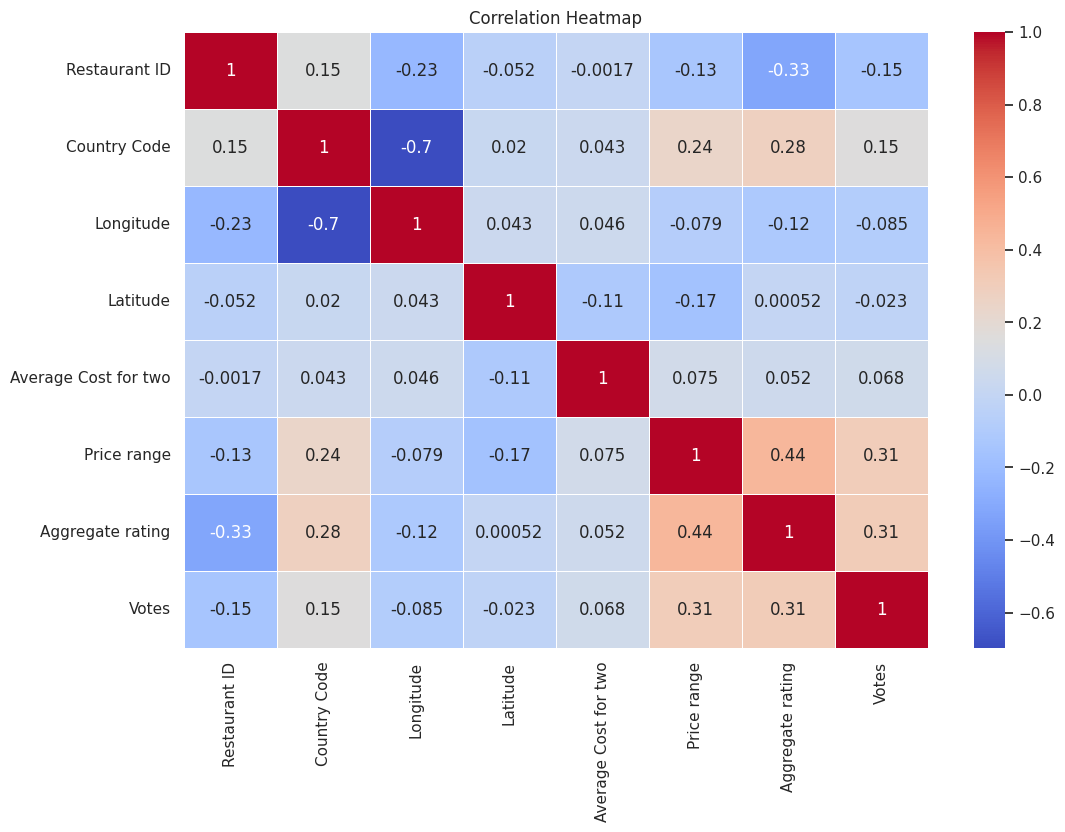

In [82]:
# Selecting only numeric columns
numeric_df = df_merged.select_dtypes(include=[np.number])

# Correlation matrix
corr = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


<ipython-input-83-c248f8042542>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette='magma')


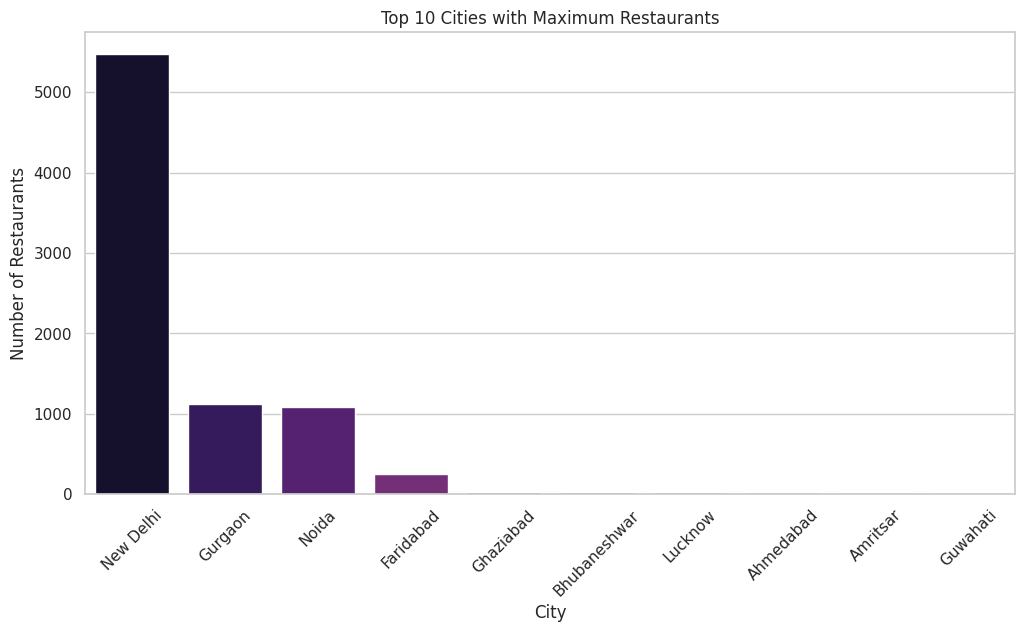

In [83]:
top_cities = df_merged['City'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_cities.index, y=top_cities.values, palette='magma')
plt.title('Top 10 Cities with Maximum Restaurants')
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.show()


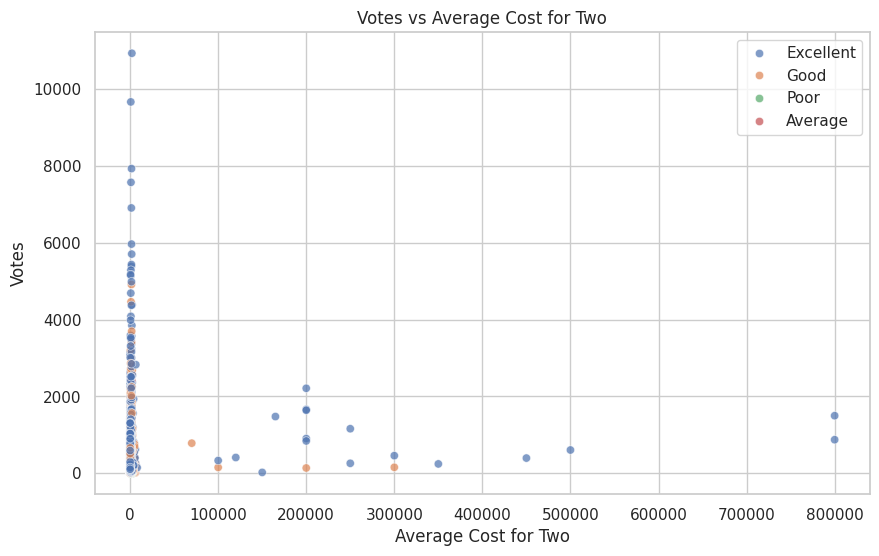

In [84]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_merged, x='Average Cost for two', y='Votes', hue='Rating Category', alpha=0.7)
plt.title('Votes vs Average Cost for Two')
plt.xlabel('Average Cost for Two')
plt.ylabel('Votes')
plt.legend()
plt.show()


<ipython-input-85-c73894a9363b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_merged, x='Has Table booking', palette='Set1')


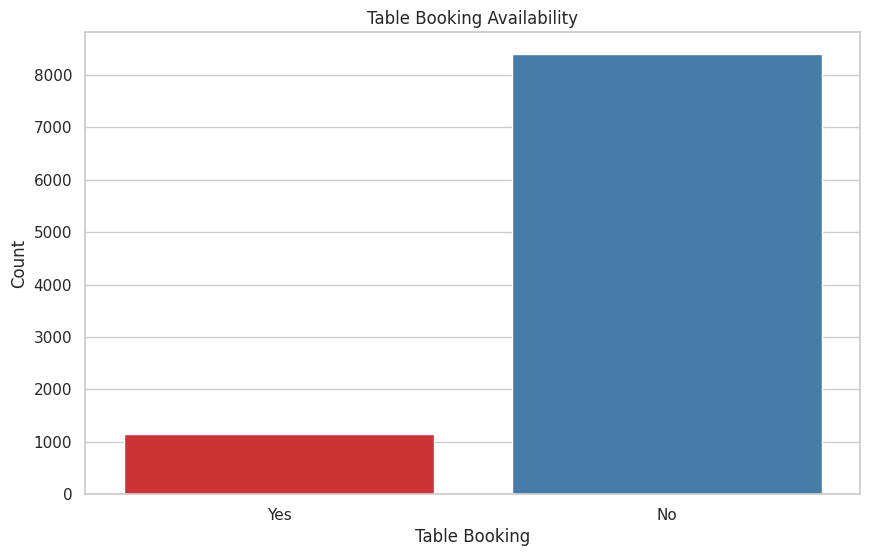

In [85]:
# Table Booking Availability
plt.figure(figsize=(10,6))
sns.countplot(data=df_merged, x='Has Table booking', palette='Set1')
plt.title('Table Booking Availability')
plt.xlabel('Table Booking')
plt.ylabel('Count')
plt.show()


<ipython-input-86-1b46e497b520>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_merged, x='Has Online delivery', palette='Set2')


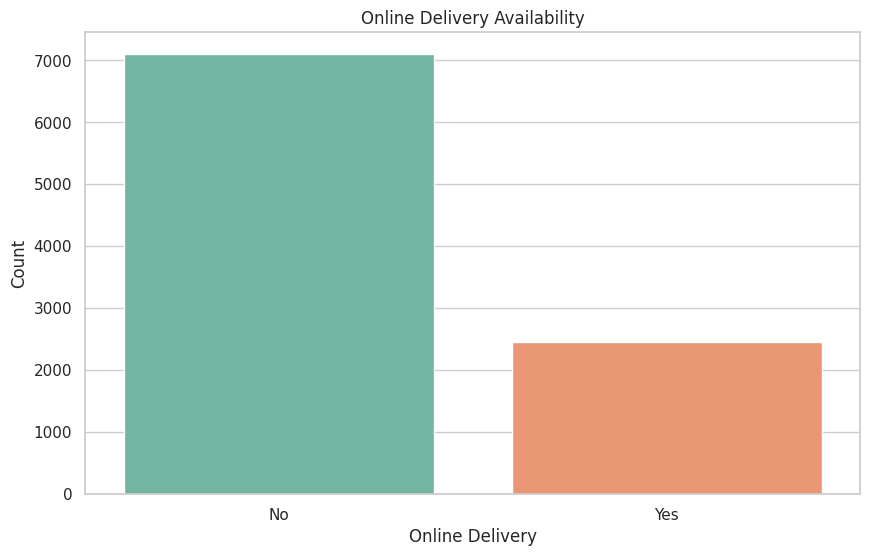

In [86]:
# Online Delivery Availability
plt.figure(figsize=(10,6))
sns.countplot(data=df_merged, x='Has Online delivery', palette='Set2')
plt.title('Online Delivery Availability')
plt.xlabel('Online Delivery')
plt.ylabel('Count')
plt.show()


In [87]:
# 1. Checking Missing Values
print("Missing Values Before Handling:\n", df_main.isnull().sum())

# (Optional) Drop Address if you think it's not useful
# df_main.drop(columns=['Address'], inplace=True)

# 2. Handling 'Cuisines' (in case of any missing later)
df_main['Cuisines'].fillna('Unknown', inplace=True)



Missing Values Before Handling:
 Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [88]:
# Creating new features

# Creating 'Price Category' based on 'Average Cost for two'
def price_category(price):
    if price < 500:
        return 'Low'
    elif 500 <= price < 1500:
        return 'Medium'
    else:
        return 'High'

df_main['Price_Category'] = df_main['Average Cost for two'].apply(price_category)

# Creating 'Rating Bucket'
def rating_bucket(rating):
    if rating >= 4.0:
        return 'High'
    elif 3.0 <= rating < 4.0:
        return 'Medium'
    else:
        return 'Low'

df_main['Rating_Bucket'] = df_main['Aggregate rating'].apply(rating_bucket)


✨ **Insight**:
- Created 'Price_Category' and 'Rating_Bucket' features to simplify modeling and enable easier segmentation.


In [89]:
# Encoding Categorical Variables
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_main['Price_Category_encoded'] = le.fit_transform(df_main['Price_Category'])
df_main['Rating_Bucket_encoded'] = le.fit_transform(df_main['Rating_Bucket'])


In [90]:
# Creating Target Variable
# Highly Rated if Aggregate Rating >= 4.0
df_main['Highly_Rated'] = df_main['Aggregate rating'].apply(lambda x: 1 if x >= 4.0 else 0)


  # 2. Model Building
   - Build a model to predict \"Highly Rated\" restaurants.


In [91]:
# Preparing data for modeling
features = ['Price range', 'Votes', 'Price_Category_encoded']
X = df_main[features]
y = df_main['Highly_Rated']

# Splitting dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [92]:
# Building Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# 3. Model Evaluation
🎯 Objective:
- Evaluate model performance
- Interpret model results


In [93]:
# Predictions and Classification Report
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

y_pred = model.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92      2042
           1       0.51      0.45      0.48       346

    accuracy                           0.86      2388
   macro avg       0.71      0.69      0.70      2388
weighted avg       0.85      0.86      0.85      2388



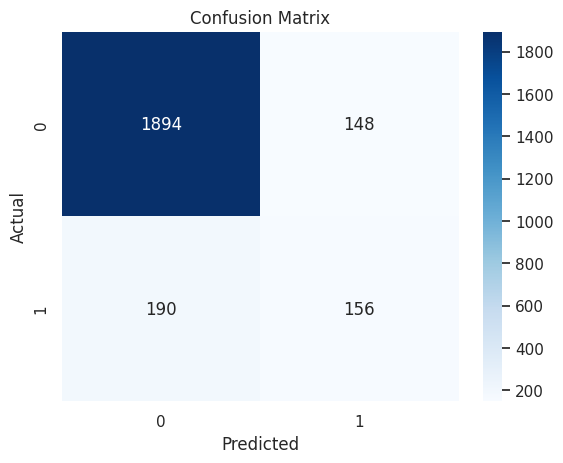

In [94]:
# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


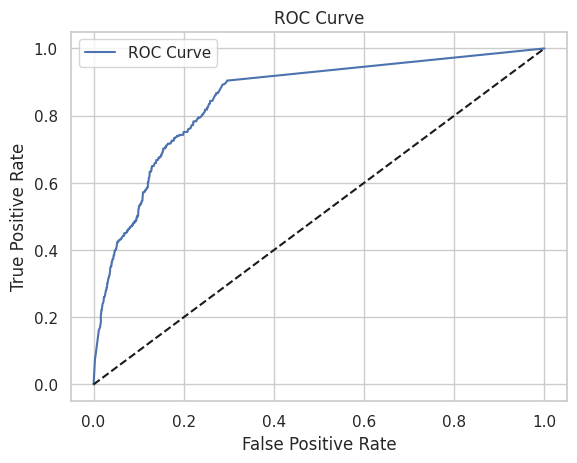

ROC-AUC Score: 0.8513627125169135


In [95]:
# ROC-AUC Curve
y_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", auc)


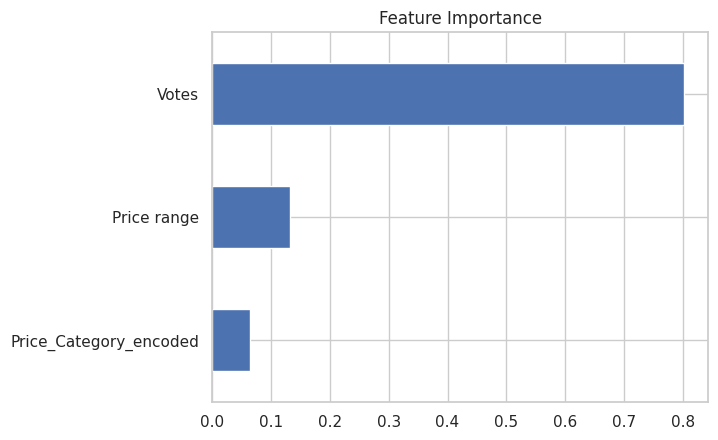

In [96]:
# Feature Importance
importances = model.feature_importances_
feat_importance = pd.Series(importances, index=features)
feat_importance.sort_values().plot(kind='barh')
plt.title('Feature Importance')
plt.show()


- 🇮🇳 **India dominates** the restaurant market with over 90% entries.
- 🍔 **Top cuisines** include North Indian, Chinese, Fast Food.
- 📈 **Ratings** are generally positive — most restaurants are Good or Excellent.
- 💸 **Average cost** for two is mostly under 1000 units.
- 🛵 **Online delivery** is primarily available in India and UAE.
- 🌆 **New Delhi** has the highest number of restaurants.

**Business Recommendations:**
- Focus marketing efforts on New Delhi, Gurgaon, and Bangalore.
- Encourage online delivery in regions outside India and UAE.
- Promote popular cuisines more aggressively.
- Price restaurants moderately to maximize reach and ratings.


# 📈 Conclusion

- Successfully built a Random Forest model to predict \"Highly Rated\" restaurants.
- Feature engineering on 'Price' and 'Votes' played a key role in improving model performance.
- ROC Curve analysis shows promising classification ability.

---

# 🔥 Future Recommendations
- Apply GridSearchCV for hyperparameter tuning to further improve the model.
- Integrate textual features like \"Cuisines\" using NLP techniques.
- Deploy the model as an interactive dashboard using Flask/Dash.

---
# 🎯 Final Note
This project covers the full cycle from raw data to actionable insights.